In [1]:
# IEEE Fraud Detection - Exploração Inicial

# ## 1. Imports e Carregamento dos Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar arquivos
identity = pd.read_csv('datasets/ieee/train_identity.csv')
transaction = pd.read_csv('datasets/ieee/train_transaction.csv')

# Mostrar dimensões
print("Identity shape:", identity.shape)
print("Transaction shape:", transaction.shape)

# Visualizar primeiras linhas
transaction.head()

Identity shape: (144233, 41)
Transaction shape: (590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# ## 2. Merge dos Dados
# Combinar pelo TransactionID
train = transaction.merge(identity, how='left', on='TransactionID')
print("Merged shape:", train.shape)
train.head()

Merged shape: (590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


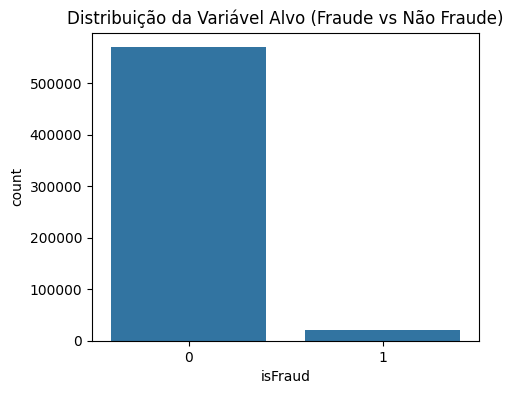

In [3]:
# ## 3. Análise da Variável Alvo
print(train['isFraud'].value_counts(normalize=True))

plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', data=train)
plt.title('Distribuição da Variável Alvo (Fraude vs Não Fraude)')
plt.show()

id_24    0.991962
id_25    0.991310
id_07    0.991271
id_08    0.991271
id_21    0.991264
id_26    0.991257
id_27    0.991247
id_23    0.991247
id_22    0.991247
dist2    0.936284
D7       0.934099
id_18    0.923607
D13      0.895093
D14      0.894695
D12      0.890410
id_04    0.887689
id_03    0.887689
D6       0.876068
id_33    0.875895
id_09    0.873123
dtype: float64


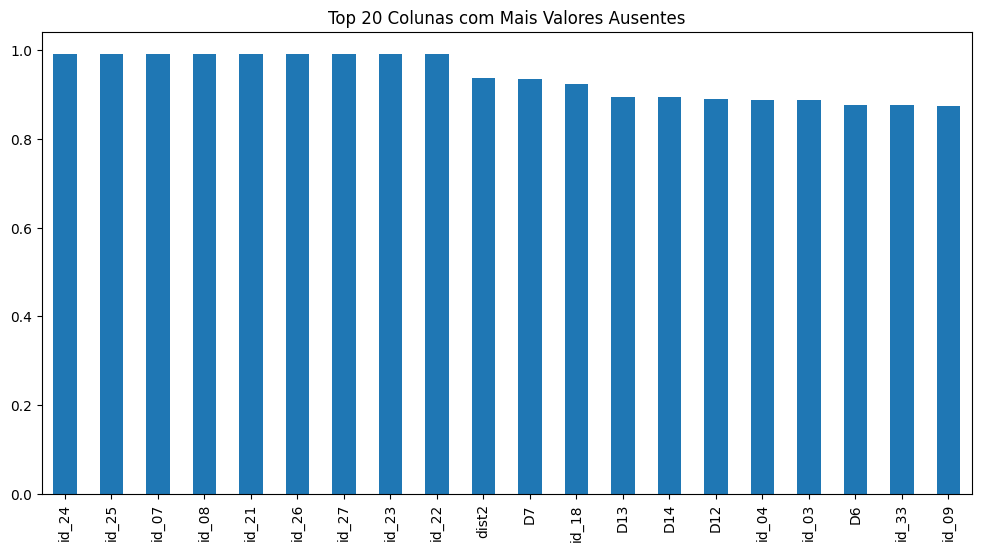

In [4]:
# ## 4. Valores Ausentes
missing = train.isnull().mean().sort_values(ascending=False)
print(missing.head(20))


plt.figure(figsize=(12,6))
missing.head(20).plot(kind='bar')
plt.title('Top 20 Colunas com Mais Valores Ausentes')
plt.show()

In [5]:
# ## 5. Estatísticas Descritivas
train.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
card2,581607.0,3.625555e+02,1.577932e+02,100.000,214.000,361.000,512.00,6.000000e+02
card3,588975.0,1.531949e+02,1.133644e+01,100.000,150.000,150.000,150.00,2.310000e+02
card5,586281.0,1.992789e+02,4.124445e+01,100.000,166.000,226.000,226.00,2.370000e+02
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,204.000,299.000,330.00,5.400000e+02
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,87.000,87.000,87.00,1.020000e+02


In [6]:
# ## 6. Correlação com Variável Alvo
corrs = train.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)
print(corrs.head(10))
print(corrs.tail(10))

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
Name: isFraud, dtype: float64
V30     -0.103088
V69     -0.104521
V91     -0.105453
V29     -0.107852
V90     -0.110168
V49     -0.110920
V48     -0.115786
id_01   -0.120099
D7      -0.127199
D8      -0.142636
Name: isFraud, dtype: float64


In [7]:
# ## 7. Sugestão de Descarte de Colunas
# - Colunas com mais de 90% de valores nulos
cols_high_null = missing[missing > 0.9].index.tolist()
print("Colunas com mais de 90% nulos:", cols_high_null[:10], "... total:", len(cols_high_null))

# - Colunas com variância zero (apenas um valor)
cols_low_var = [col for col in train.columns if train[col].nunique() == 1]
print("Colunas com baixa variância:", cols_low_var)

Colunas com mais de 90% nulos: ['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_27', 'id_23', 'id_22', 'dist2'] ... total: 12
Colunas com baixa variância: []


In [8]:
# Remover colunas de alta nulidade e baixa variância
train_clean = train.drop(columns=cols_high_null + cols_low_var)
print("Shape após limpeza:", train_clean.shape)

Shape após limpeza: (590540, 422)


In [9]:
# Preencher valores nulos em colunas numéricas com a mediana
num_cols = train_clean.select_dtypes(include=[np.number]).columns
train_clean[num_cols] = train_clean[num_cols].fillna(train_clean[num_cols].median())

In [10]:
# Preencher valores nulos em colunas categóricas com a string 'missing'
cat_cols = train_clean.select_dtypes(include=['object']).columns
train_clean[cat_cols] = train_clean[cat_cols].fillna('missing')

In [11]:
# Encoding simples para variáveis categóricas (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    train_clean[col] = le.fit_transform(train_clean[col])

In [12]:
print("Dataset pronto para modelagem.")
train_clean.head()

Dataset pronto para modelagem.


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,4,13926,361.0,150.0,1,142.0,...,96,24.0,260,4,2,2,2,2,1,1735
1,2987001,0,86401,29.0,4,2755,404.0,150.0,2,102.0,...,96,24.0,260,4,2,2,2,2,1,1735
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,96,24.0,260,4,2,2,2,2,1,1735
3,2987003,0,86499,50.0,4,18132,567.0,150.0,2,117.0,...,96,24.0,260,4,2,2,2,2,1,1735
4,2987004,0,86506,50.0,1,4497,514.0,150.0,2,102.0,...,124,32.0,164,3,1,0,1,1,2,954
